In [1]:
#Import the GST module -- you probably want this at the beginning of every notebook
import pygsti
import pygsti.report.plotting as pplt
import json
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
gs_target = pygsti.io.load_gateset("tutorial_files/Example_Gateset.txt")
gs_mc2gst = pygsti.io.load_gateset("tutorial_files/Example_MC2GST_Gateset.txt")
gs_elgst = pygsti.io.load_gateset("tutorial_files/Example_eLGST_Gateset.txt")
ds = pygsti.io.load_dataset("tutorial_files/Example_Dataset.txt", cache=False)
fiducialList = pygsti.io.load_gatestring_list("tutorial_files/Example_FiducialList.txt")
germList = pygsti.io.load_gatestring_list("tutorial_files/Example_GermsList.txt")
maxLengthList = json.load(open("tutorial_files/Example_maxLengths.json","r"))
specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
strs = pygsti.construction.get_spam_strs(specs)

print "Gates (%d): " % len(gs_target.gates), gs_target.gates.keys()
print "Fiducials (%d): " % len(fiducialList), map(str,fiducialList)
print "Germs (%d): " % len(germList),map(str,germList)
print "Dataset has %d gate strings" % len(ds)

Loading tutorial_files/Example_Dataset.txt: 100%
Gates (3):  ['Gi', 'Gx', 'Gy']
Fiducials (6):  ['{}', 'Gx', 'Gy', 'GxGx', 'GxGxGx', 'GyGyGy']
Germs (11):  ['Gx', 'Gy', 'Gi', 'GxGy', 'GxGyGi', 'GxGiGy', 'GxGiGi', 'GyGiGi', 'GxGxGiGy', 'GxGyGyGi', 'GxGxGyGxGyGy']
Dataset has 2737 gate strings


In [3]:
## Create a gateset with target gates but SPAM ops given by contracted LGST 
#specs = pygsti.construction.build_spam_specs(fiducialGateStrings=fiducialList)
#gs_lgst = pygsti.do_lgst(ds, specs, targetGateset=gs_target, svdTruncateTo=4, verbosity=0)
#gs_after_gauge_opt = pygsti.optimize_gauge(gs_lgst, "target", targetGateset=gs_target)
#gs_clgst = pygsti.contract(gs_after_gauge_opt, "CPTP")
#
#gs_targetspam = gs_target.copy()
#gs_targetspam.preps = [v.copy() for v in gs_clgst.preps]
#gs_targetspam.effects = [v.copy() for v in gs_clgst.effects]
#gs_targetspam.make_spams()

#print "TargetSpam: ", pygsti.chi2( ds, gs_targetspam)
#print "Constrained LGST: ", pygsti.chi2( ds, gs_clgst )

In [4]:
## Debug: Check Chi2 gradient and hessian (takes a long time); no output is GOOD
#chi2_elgst, dchi2_elgst, d2chi2_elgst = pygsti.chi2( ds, gs_elgst, returnDeriv=True,
#                                                             returnHessian=True, check=True )
#chi2_lsgst, dchi2_lsgst, d2chi2_lsgst = pygsti.chi2( ds, gs_mc2gst, returnDeriv=True,
#                                                             returnHessian=True, check=True )

In [5]:
print "eLGST: ", pygsti.chi2( ds, gs_elgst)
print "LSGST: ", pygsti.chi2( ds, gs_mc2gst)

eLGST:  12017.1124926
LSGST:  2799.71352197


In [6]:
#Collect data we need for making plots
Xs = maxLengthList[1:]; xlbl = "L (max length)"
Ys = germList; ylbl = "Germ"
gateStrDict = { (x,y):pygsti.construction.repeat_with_max_length(y,x,False) for x in Xs for y in Ys }

#remove duplicates by replacing duplicate strings with None
runningList = []
for x in Xs:
    for y in Ys:
        if gateStrDict[(x,y)] in runningList:
            gateStrDict[(x,y)] = None
        else: runningList.append( gateStrDict[(x,y)] )

In [7]:
#Note on internals of plotting: lower left is origin in (rho-vec,E-vec index space) of sub-matrices
#M = diag(range(10))
#fig,axes = subplots()
#axes.pcolormesh(M)
#print M


## $\chi^2$ Plots

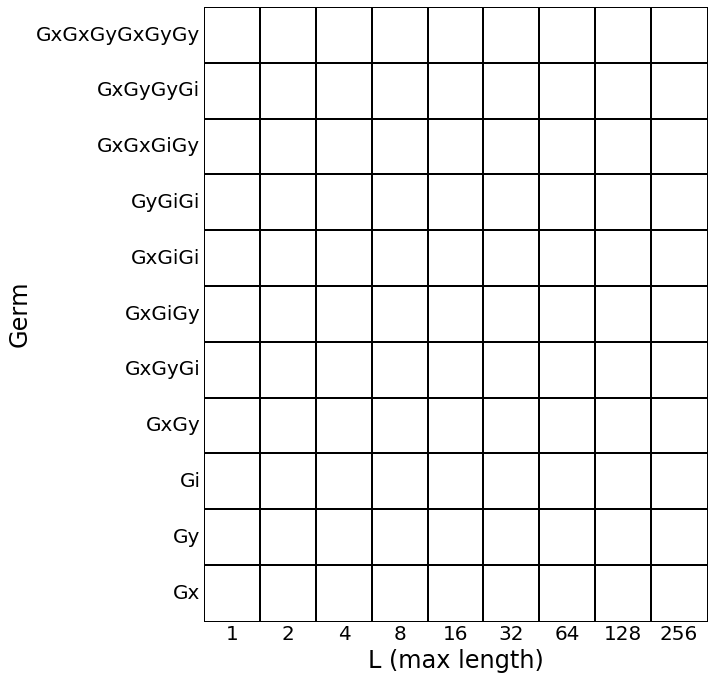

In [8]:
pplt.blank_boxplot( Xs, Ys, gateStrDict, strs, xlbl, ylbl, sumUp=True, ticSize=20)

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:357: RuntimeWarning: invalid value encountered in greater
  return_value = _np.where(_np.greater(norm_trans, lin_norm_value),
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:790: RuntimeWarning: invalid value encountered in greater_equal
  return umath.absolute(a) * self.tolerance >= umath.absolute(b)
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:802: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


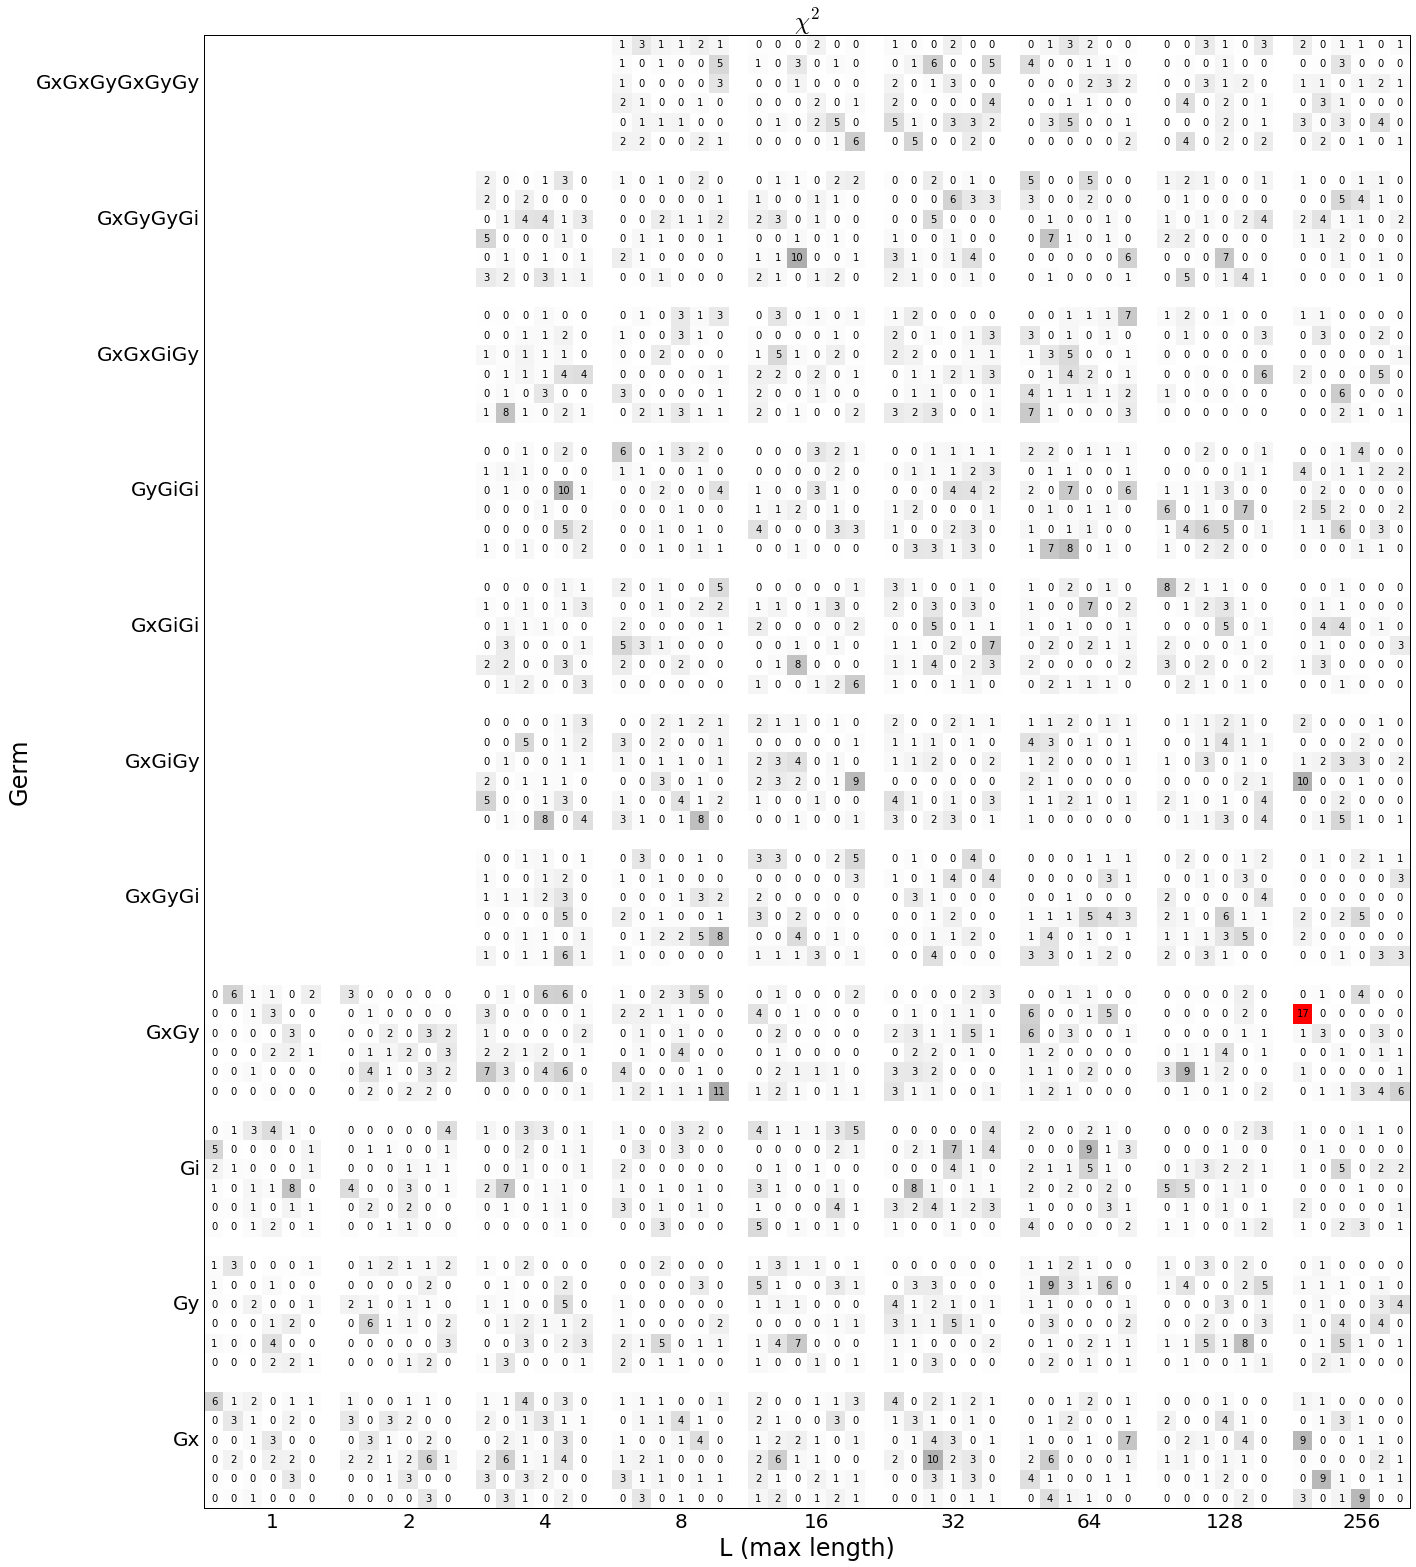

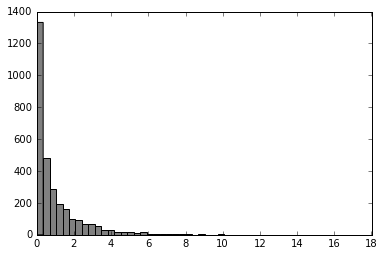

In [9]:
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                   scale=1.0, sumUp=False, histogram=True)

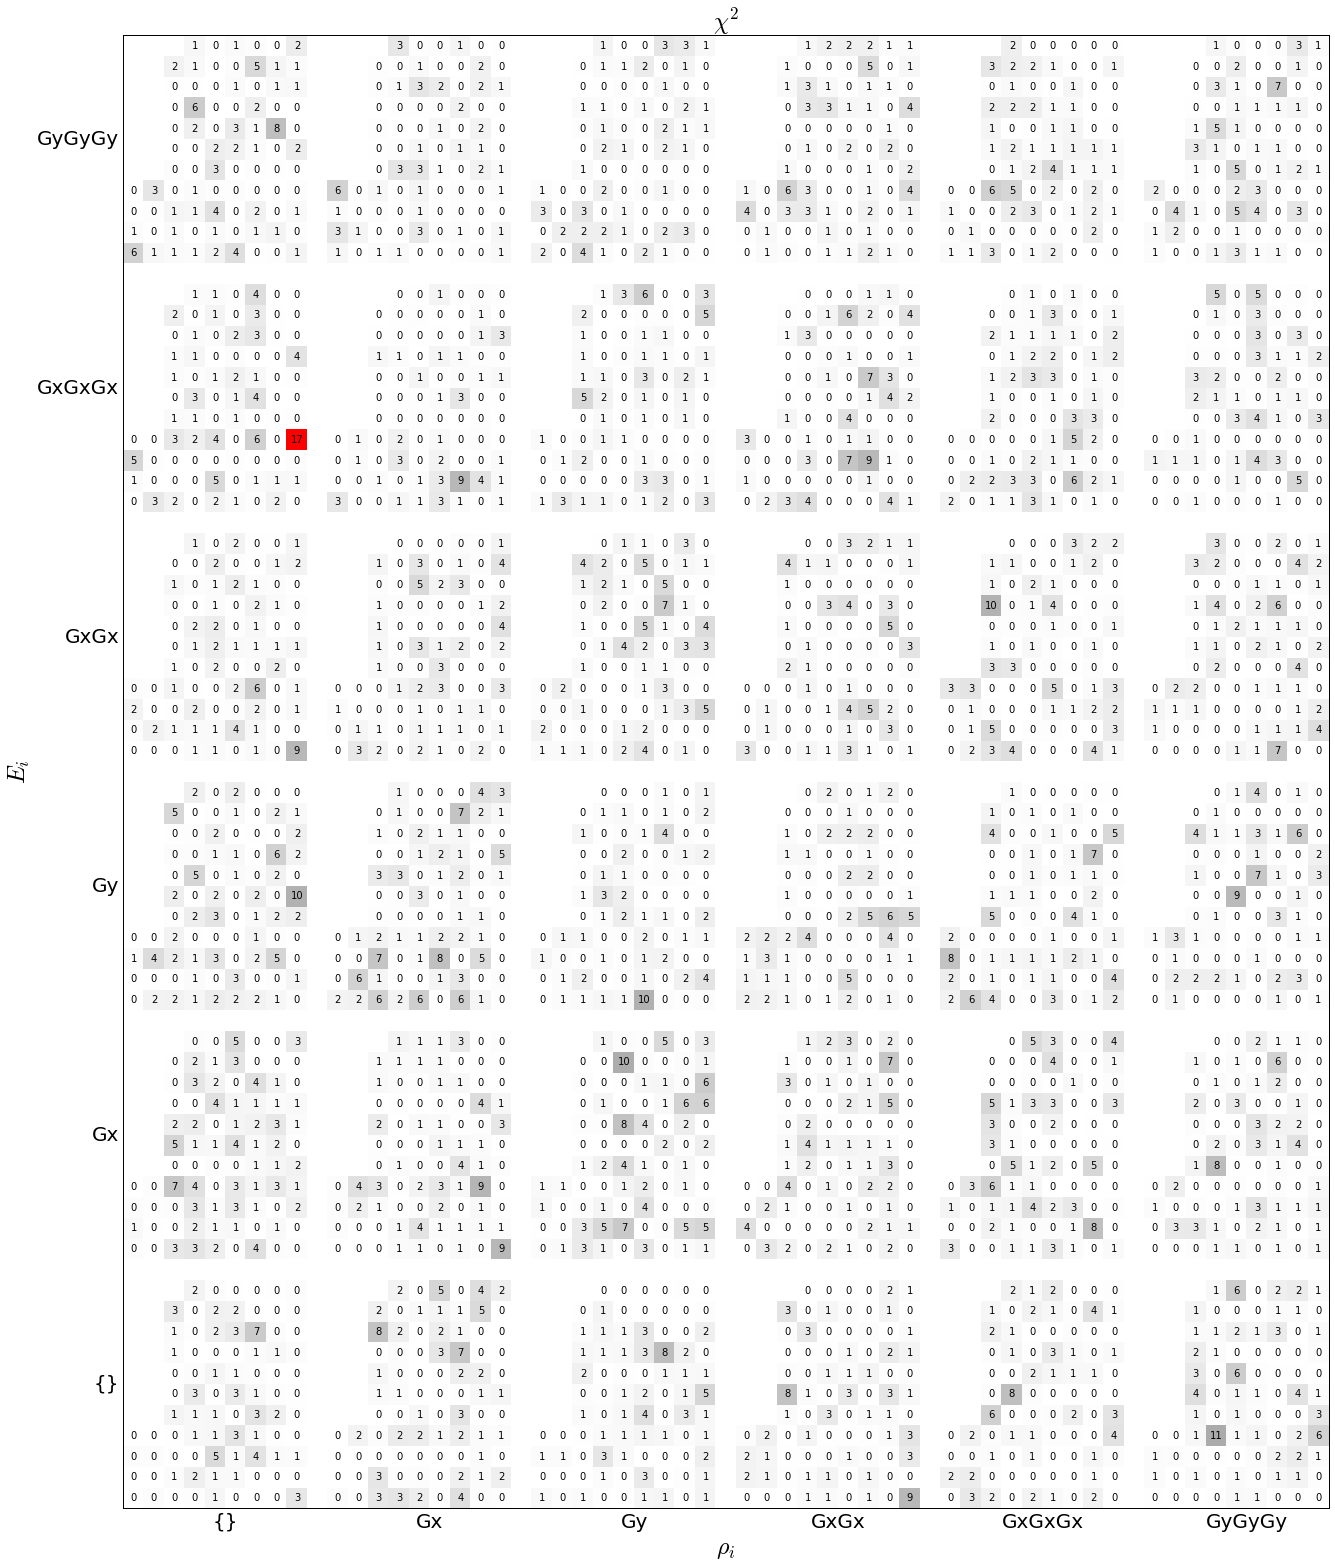

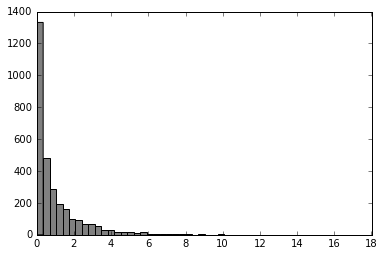

In [10]:
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                   scale=1.0, sumUp=False, histogram=True, invert=True)

/home/enielse/research/pyGSTi/packages/pygsti/report/plotting.py:352: RuntimeWarning: invalid value encountered in log10
  log10_norm_trans = _np.log10(norm_trans)


/usr/lib64/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/colors.py:581: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


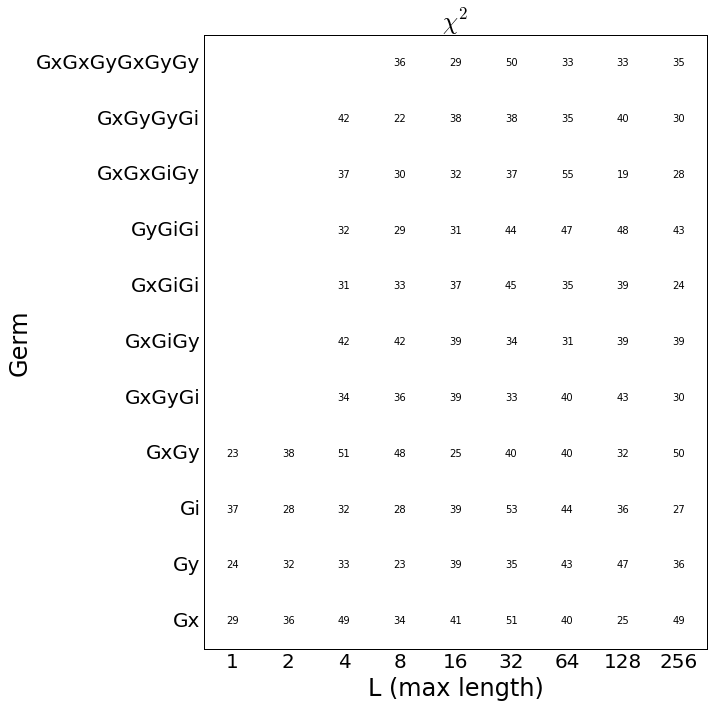

In [11]:
pplt.chi2_boxplot( Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
                    scale=1.0, sumUp=True)

## Direct $\chi^2$ Plots

In [12]:
directLGST = pplt.direct_lgst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, verbosity=2)
directLSGST = pplt.direct_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
                                ds, specs, gs_target, svdTruncateTo=4, minProbClipForWeighting=1e-2, 
                                probClipInterval=(-1e6,1e6), verbosity=2)

#focusedGS = AT.focused_mc2gst_gatesets( [gs for gs in gateStrDict.values() if gs is not None],
#                                ds, specs, gs_mc2gst, minProbClipForWeighting=1e-2, 
#                                probClipInterval=(-1e6,1e6), verbosity=2)

--- Direct LGST precomputation ---
--- Computing gateset for string 0 of 84 ---
--- LGST ---
--- Computing gateset for string 1 of 84 ---
--- LGST ---
--- Computing gateset for string 2 of 84 ---
--- LGST ---
--- Computing gateset for string 3 of 84 ---
--- LGST ---
--- Computing gateset for string 4 of 84 ---
--- LGST ---
--- Computing gateset for string 5 of 84 ---
--- LGST ---
--- Computing gateset for string 6 of 84 ---
--- LGST ---
--- Computing gateset for string 7 of 84 ---
--- LGST ---
--- Computing gateset for string 8 of 84 ---
--- LGST ---
--- Computing gateset for string 9 of 84 ---
--- LGST ---
--- Computing gateset for string 10 of 84 ---
--- LGST ---
--- Computing gateset for string 11 of 84 ---
--- LGST ---
--- Computing gateset for string 12 of 84 ---
--- LGST ---
--- Computing gateset for string 13 of 84 ---
--- LGST ---
--- Computing gateset for string 14 of 84 ---
--- LGST ---
--- Computing gateset for string 15 of 84 ---
--- LGST ---
--- Computing gateset for strin

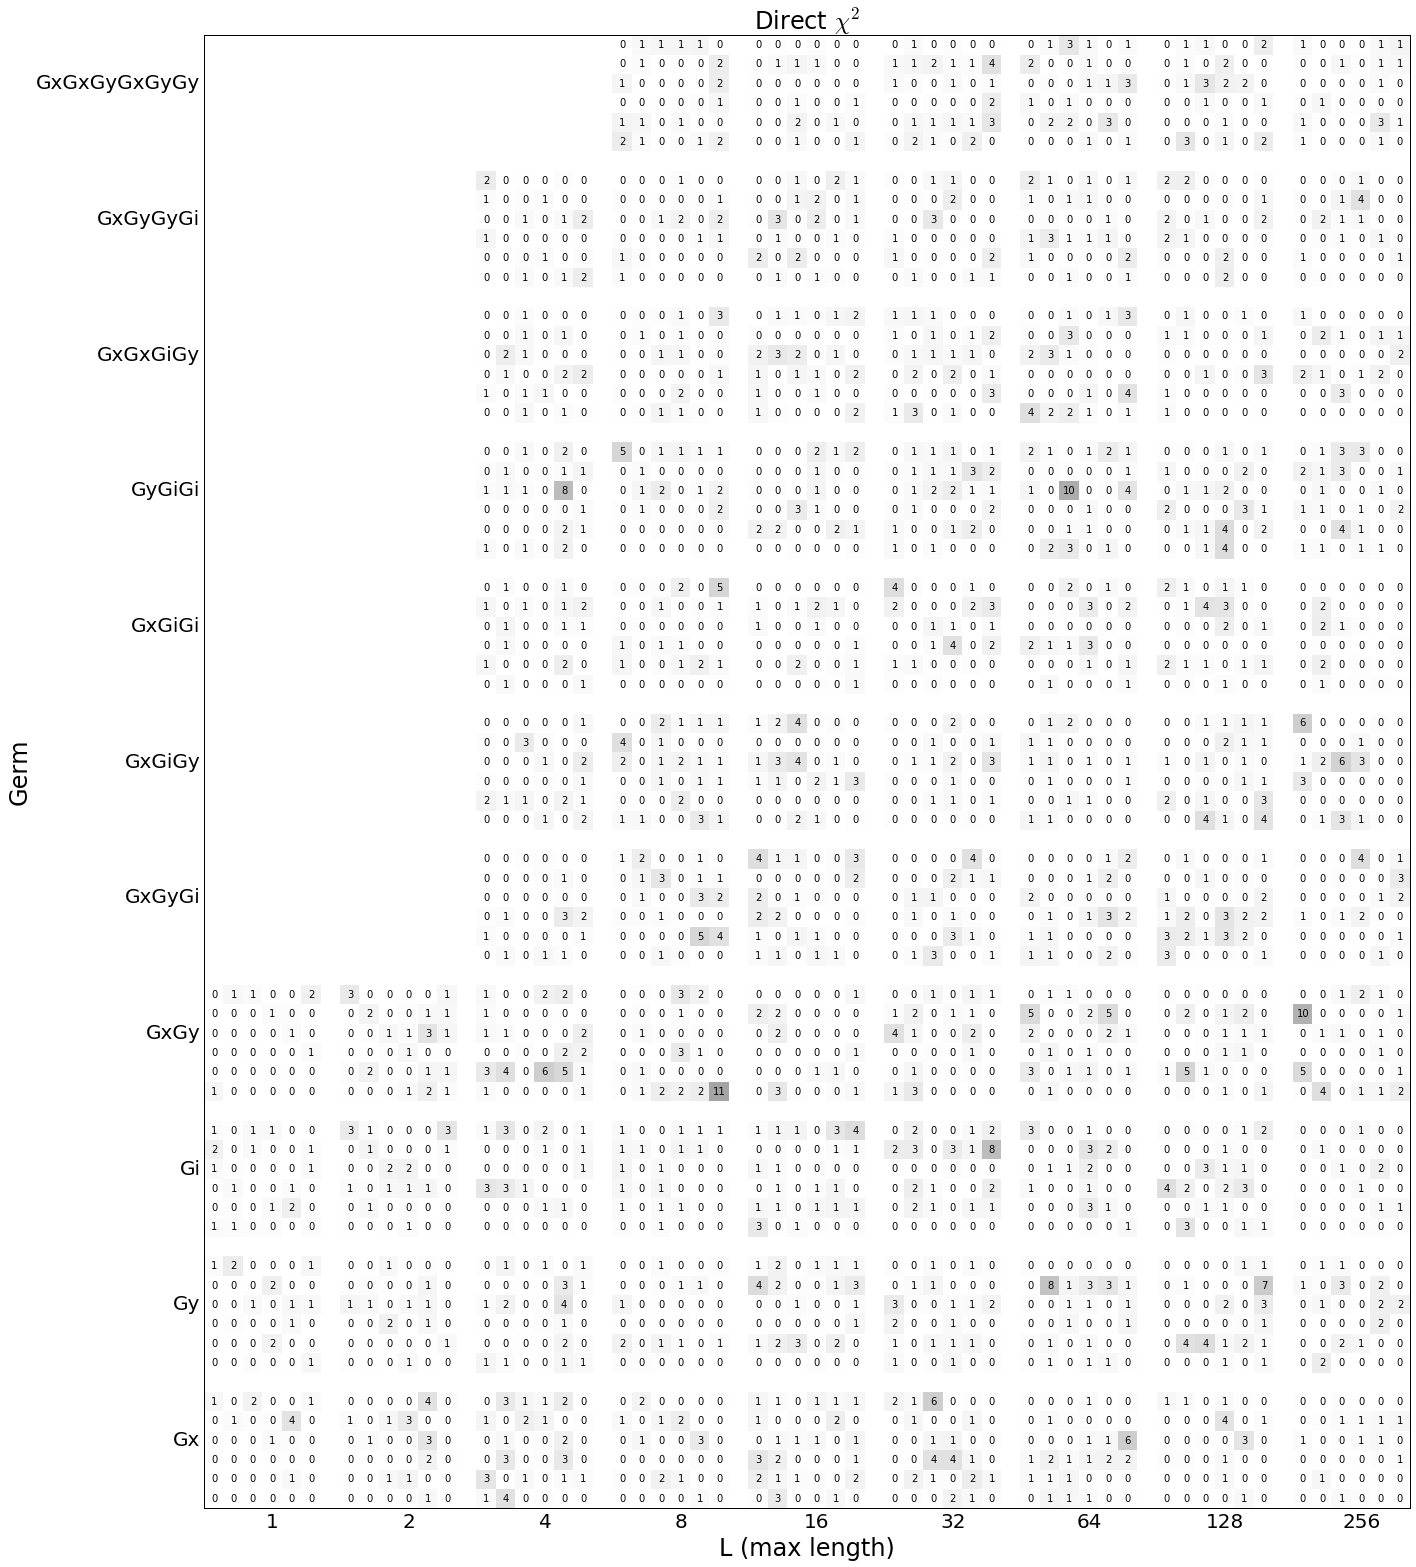

In [13]:
pplt.direct_chi2_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                          scale=1.0, boxLabels=True )

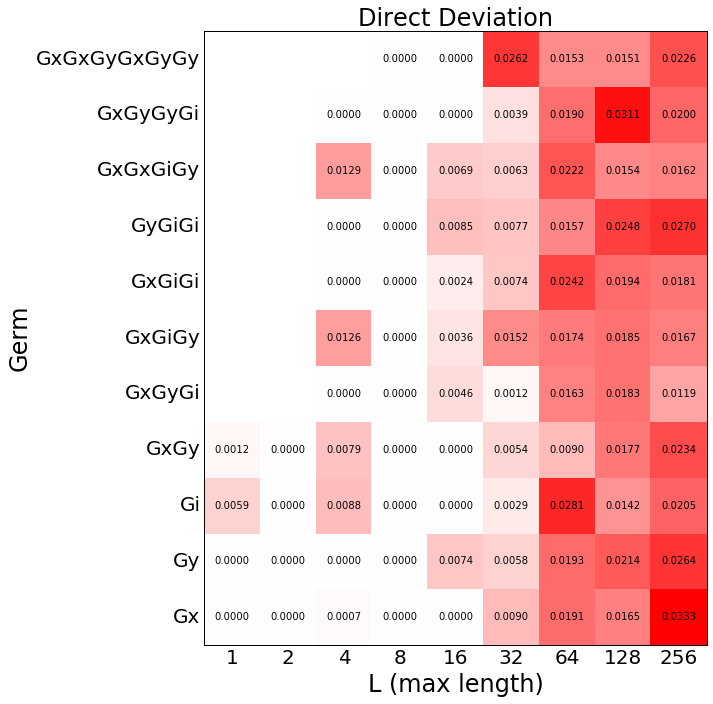

In [14]:
pplt.direct_deviation_boxplot(Xs, Ys, gateStrDict, ds, gs_mc2gst, directLSGST, xlbl, ylbl, prec=4,
                            scale=1.0, boxLabels=True)

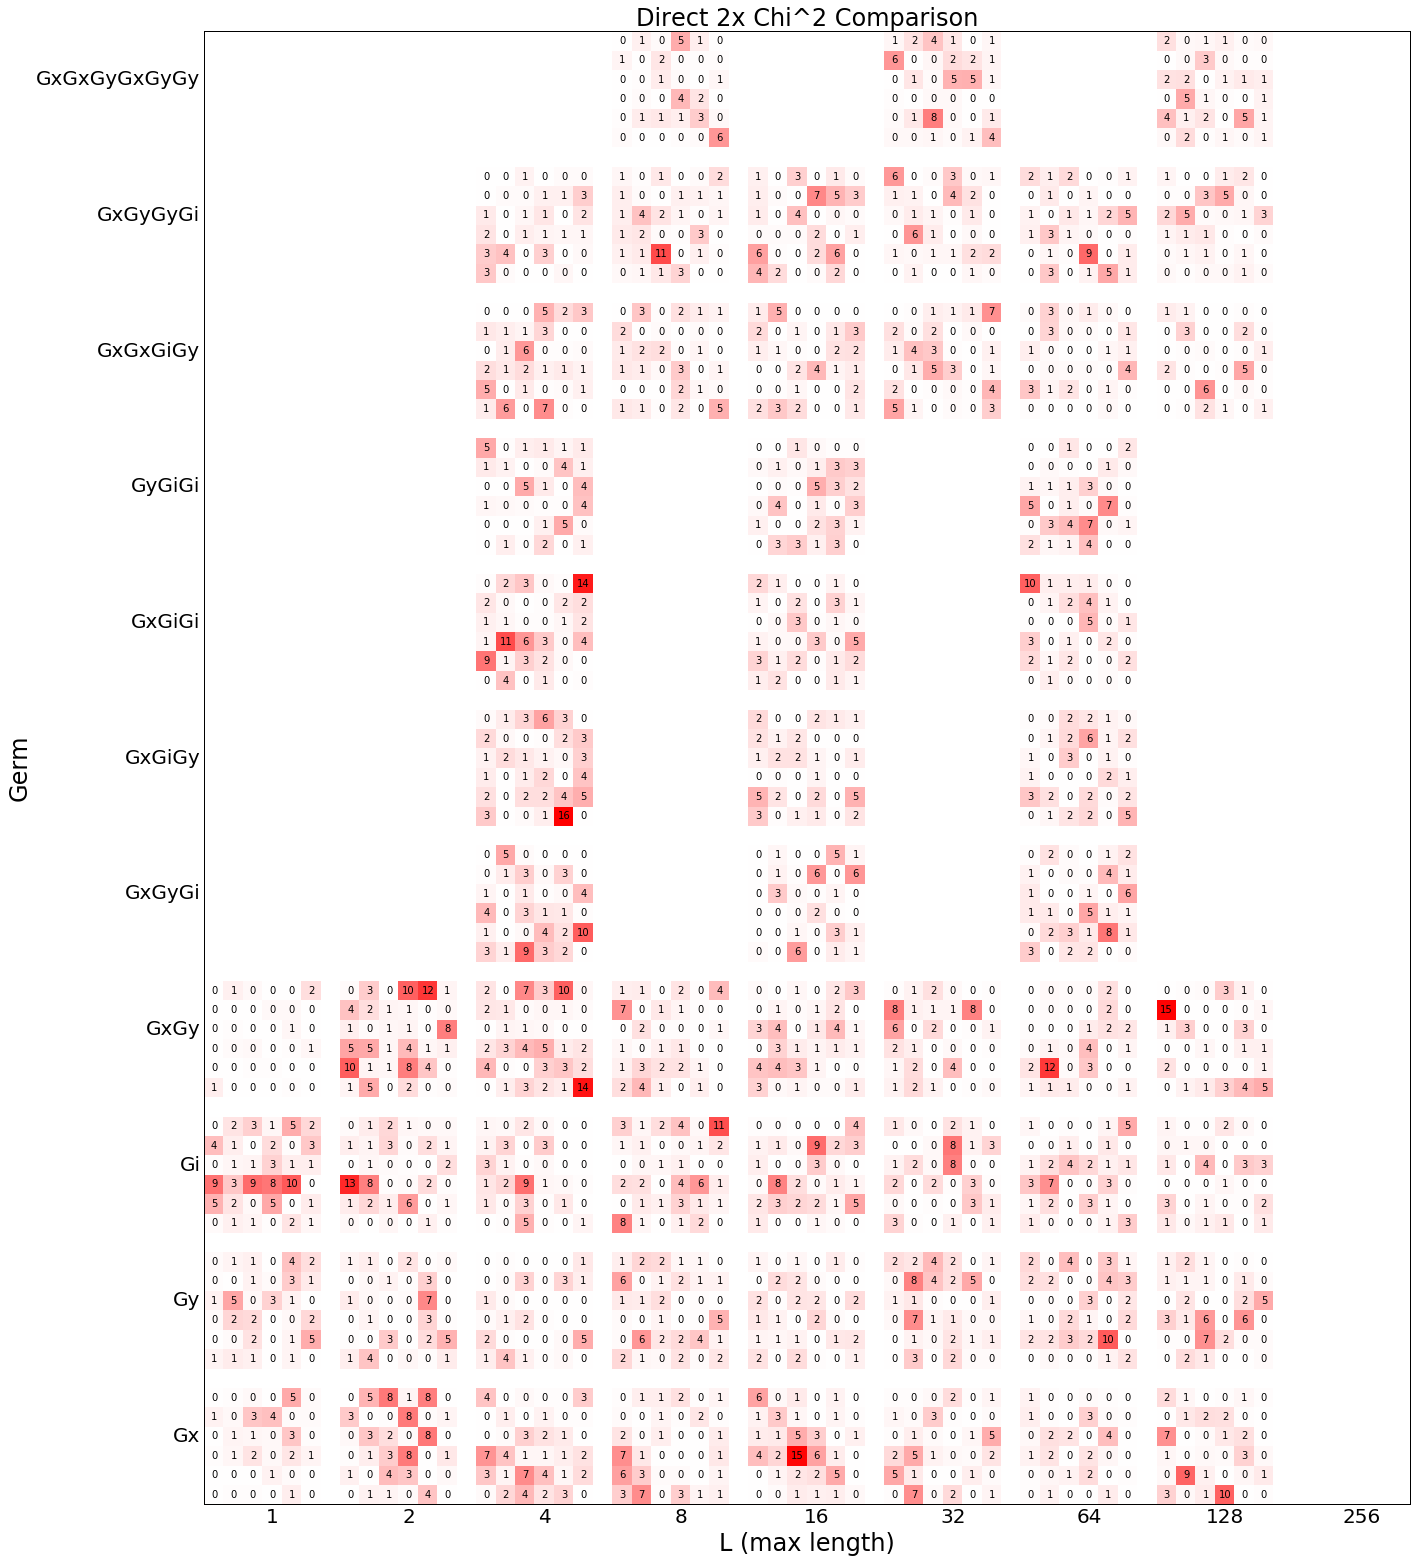

In [15]:
pplt.direct2x_comp_boxplot( Xs, Ys, gateStrDict, ds, directLSGST, strs, xlbl, ylbl,
                            scale=1.0, boxLabels=True )

## Error Rate Plots (uses Direct-X results)

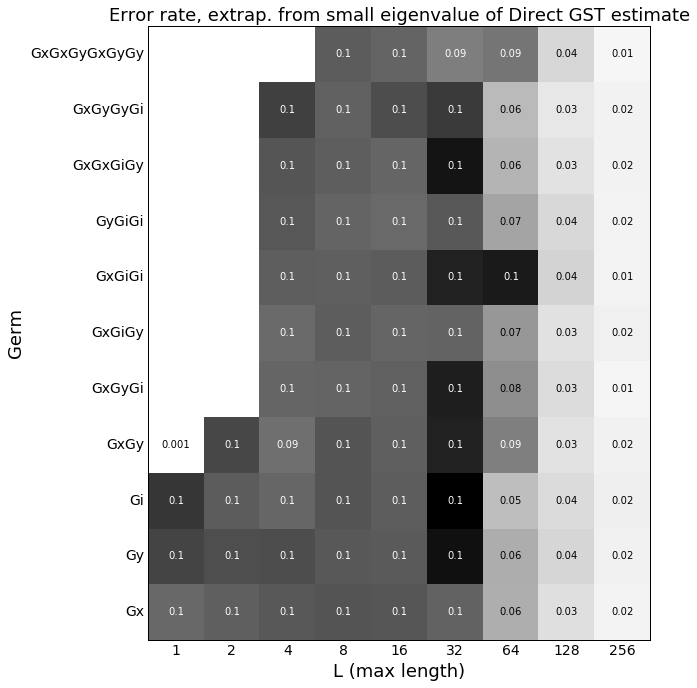

In [16]:
pplt.small_eigval_err_rate_boxplot(Xs, Ys, gateStrDict, ds, directLSGST, xlbl, ylbl,
                                  scale=1.0, boxLabels=True)

## Whack-a-$\chi^2$-mole Plots

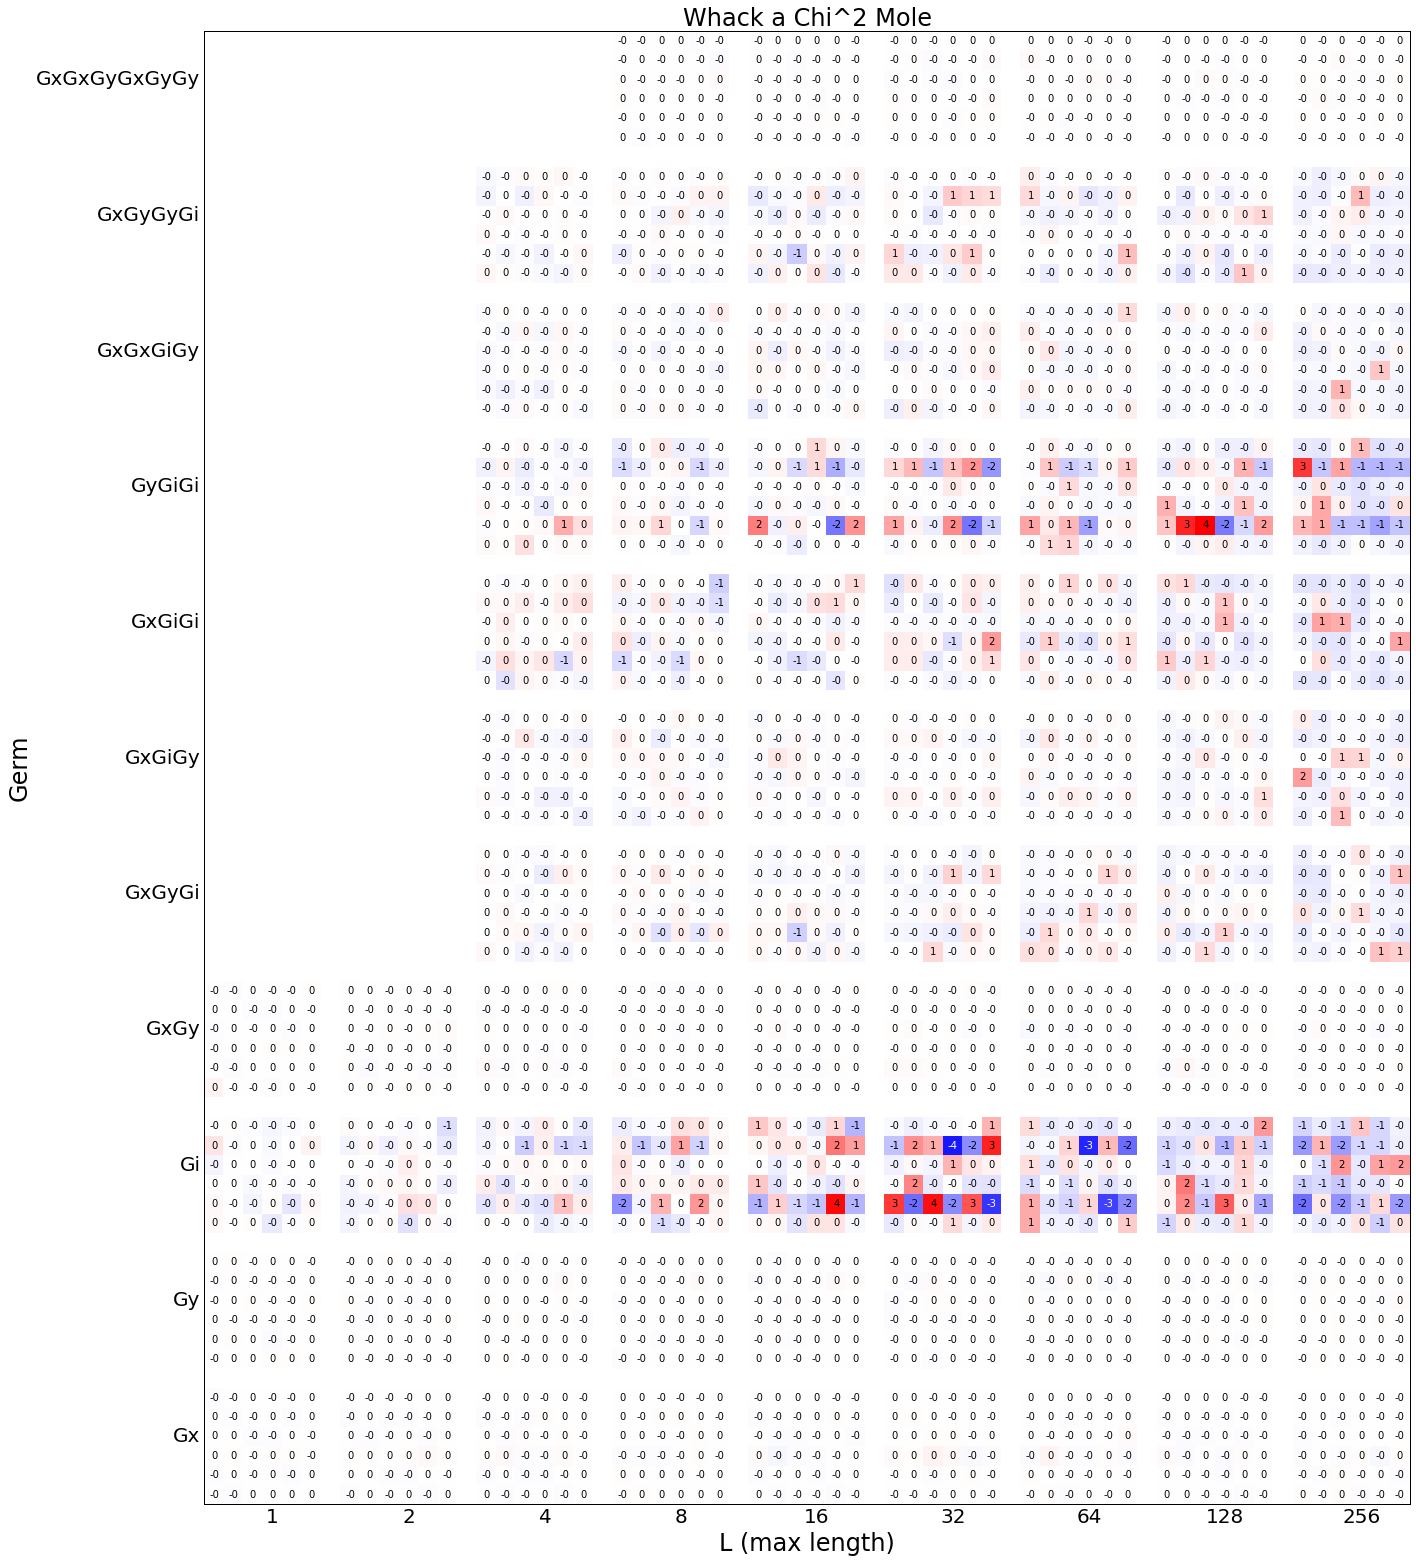

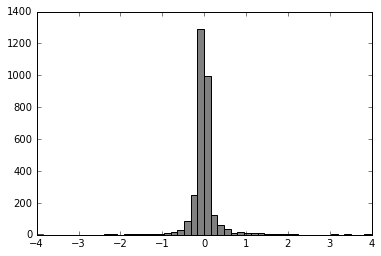

In [17]:
whack = pygsti.objects.GateString( ('Gi',)*256 )
fullGatestringList = pygsti.io.load_gatestring_list("tutorial_files/Example_LSGSTlist256.txt")
pplt.whack_a_chi2_mole_boxplot( whack, fullGatestringList, Xs, Ys, gateStrDict, ds, gs_mc2gst, strs, xlbl, ylbl,
               scale=1.0, sumUp=False, histogram=True )

## Other Stuff

In [18]:
lsgst_after_gauge_opt = pygsti.optimize_gauge(gs_mc2gst, "target", targetGateset=gs_target)
gs_clsgst = pygsti.contract(lsgst_after_gauge_opt, "CPTP")

In [19]:
pygsti.chi2( ds, gs_clsgst )

2799.7731492910516

In [20]:
#TODO: Generate fake data so we can test the other truncation methods, which require different sets of gate strings
gatestring_list = pygsti.construction.list_all_gatestrings(gs_clsgst.gates.keys(),minlength=0,maxlength=4)
dsFake = pygsti.construction.generate_fake_data(gs_clsgst, gatestring_list, nSamples=100, sampleError='binomial', seed=101)

In [21]:
#Truncation type A: x values are lengths, and germ is repeated to exceed the desired length,
#then truncated to exactly the desired length
#AT.chi2_boxplot( germList, [2], "L (trunc type A)", dsFake, gs_mc2gst, 'plus', specs,
#                M=10, scale=1.0, sumUp=False, interactive=False, histogram=True )

In [22]:
#Truncation type B: x values are lengths, and germ is repeated an integer number of times
# such that the resulting string has length less than or equal to the desired length
#specs = GST.get_spam_specs(fiducialGateStrings=fiducialDict.values())
#AT.chi2_boxplot( Germs, [2], "L (trunc type B)", dsFake, gs_llsgst, 'plus', specs,
#                M=10, scale=1.0, sumUp=False, interactive=False, histogram=True )